In [1]:
import sys
import os
import pandas as pd
import numpy as np
from importlib import reload
import heapq

# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# local import
sys.path.append("../")
from utils.trackmate import dataEngineering as _tm
from utils.visualization import generalPlots as _plot
from utils.trackmate import spatialAnalysis as _stat

/home/cstansbu/.local/lib/python3.8/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [18]:
reload(_tm)
ROOT_DIR = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/test/mitosis_example/"

data = _tm.load_trackmate_dir(ROOT_DIR)
df = _tm.merge_tracks_and_all(data)

df = _tm.clean_up_trackSpots(df)
df.head()

All shape: (5257, 31)
Links shape: (5012, 16)
Track shape: (210, 45)
Spots shape: (5222, 31)
merged shape: (5222, 75)
cleaned shape (5222, 69)


,Label_x,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,TOTAL_ABSOLUTE_ANGLE_XY,TOTAL_ABSOLUTE_ANGLE_YZ,TOTAL_ABSOLUTE_ANGLE_ZX,STEP,NORMED_STEP,MEAN_INTENSITY01_SCALED,MEAN_INTENSITY02_SCALED,MEAN_INTENSITY03_SCALED,MEAN_INTENSITY04_SCALED,MEAN_INTENSITY_SCALED
11,ID21096,21096,0,25.144,821.391,78.240,0,0.000,0,10,...,-1.544,3.142,1.571,0,0.00000,0.841748,0.334067,1.000000,0.127256,1.000000
96,ID20992,20992,0,17.062,832.539,68.450,0,2090.262,1,10,...,-1.544,3.142,1.571,1,0.00001,0.358019,0.000000,0.350980,0.176017,0.350980
248,ID21198,21198,0,25.445,824.123,78.969,0,4180.524,2,10,...,-1.544,3.142,1.571,2,0.00002,0.785418,0.385493,0.936499,0.261116,0.936499
309,ID21299,21299,0,22.002,802.724,92.174,0,6270.786,3,10,...,-1.544,3.142,1.571,3,0.00003,0.969756,0.538638,0.961557,0.440129,0.961557
408,ID21400,21400,0,21.226,796.236,86.282,0,8361.048,4,10,...,-1.544,3.142,1.571,4,0.00004,0.910256,0.569170,0.912612,0.498539,0.912612


Text(0.5, 0, 'Y Coordinate')

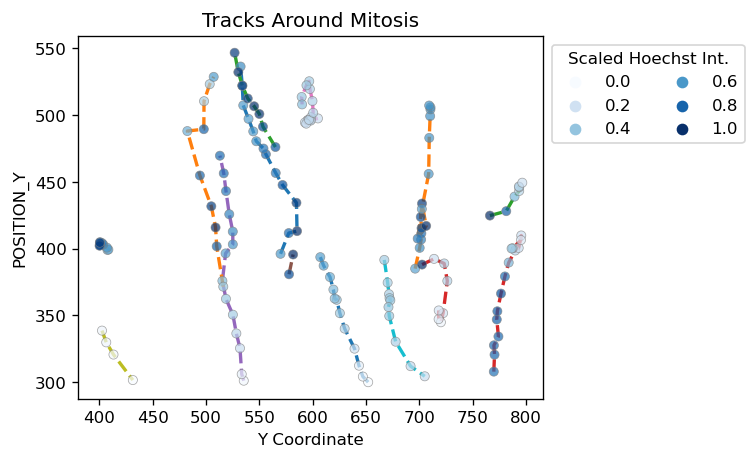

In [117]:
"go to split event"

TOI = list(range(20, 36))

mask = (df['FRAME'].isin(TOI)) \
       & (df['POSITION_X'] > 400) \
       & (df['POSITION_X'] < 800) \
       & (df['POSITION_Y'] > 300) \
       & (df['POSITION_Y'] < 550) \

event = df[mask]

matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (5, 4)


for i, tr in enumerate(event['TRACK_ID'].unique()):
    track = event[event['TRACK_ID'] == tr]
    
    plt.plot(track['POSITION_X'], 
             track['POSITION_Y'],
             '--',
             lw=2,
             c=f"C{i}",
             zorder=-1)

sns.scatterplot(data=event, 
             x='POSITION_X',
             y='POSITION_Y',
             hue='MEAN_INTENSITY01_SCALED',
             s=30,
             alpha=0.7,
             edgecolor='gray',
             palette='Blues')

plt.legend(title="Scaled Hoechst Int.", 
           bbox_to_anchor=(1, 1), 
           ncol=2)

plt.title('Tracks Around Mitosis')
plt.xlabel('X Coordinate')
plt.xlabel('Y Coordinate')